# Curso Completo de Pandas(Parte 1) 


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="Drawing" style="width: 350px;"/>




En este curso vamos a aprender como usar la libreria de pandas para data analisis. Podes pensar a Pandas como una versión extremadamente poderosa de Excel, con un monton mas de posibilidades. Los Temas que vamos a ver son los siguientes:

__Crognograma__

* Librerias
* Manejo de Directorio (OS)
* Análisis Introductorio
* Selección de Filas y Columnas
* Filtering, Selección Condicionada
* Reslover NaN Values
* Operaciones con DataFrames
* Concadenar
* Exportar Archivos 
* Gráficos con Pandas
***

Te recomiendo que tengas a mano la página oficial de pandas: https://pandas.pydata.org/docs/user_guide/index.html

Para mas información en como editar celdas Markdown:  https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

## Librerias

In [21]:
#Instalar si es necesario 
# Formato: !pip install Nombre_de_libreria
!pip install numpy
!pip install pandas 

In [22]:
import numpy as np
import pandas as pd
import os

## Manejo del  Dierctorio con OS

In [23]:
#current working Directory
os.getcwd()

'C:\\Users\\Matias\\Downloads'

In [24]:
#Change Directory
os.chdir("C:/Users/Matias/Downloads")

### Importar Archivos

In [31]:
#CSV 
df = pd.read_csv("./pandas-master/pandas-master/pokemon_data.csv")
#Excel 
df_excel = pd.read_excel("./pandas-master/pandas-master/pokemon_data.xlsx")

Otros tipos de archivos comunes son: 
- JSON Files
- HTML Files
- SQL Files

Puede probar **pd.read**  y apretar tab para ver otras opciones

## Análisis Introductorio

In [23]:
df. head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [33]:
# Devuelve (filas, columnas)
df.shape

(800, 12)

In [34]:
#Lista de Columnas
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [35]:
#Estadísticas 
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Pandas Profilinig (mas avanzado)

In [ ]:
!pip install pandas-profiling[notebook,html]

In [27]:
from pandas_profiling import ProfileReport

In [158]:
ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

## Selección de Filas y Columnas  

###  Columnas

In [34]:
df["HP"].head()

0    45
1    60
2    80
3    80
4    39
Name: HP, dtype: int64

In [36]:
df[["Attack","Defense"]].head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


###  Filas

In [37]:
df.loc[0]

#                     1
Name          Bulbasaur
Type_1            Grass
Type_2           Poison
HP                   45
Attack               49
Defense              49
Sp._Atk              65
Sp._Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

In [36]:
df.loc[[0,4]]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [49]:
df.set_index("#").head( )

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [62]:
df.set_index("Name", inplace=True)

In [64]:
df.loc["Bulbasaur"]

#                  1
Type 1         Grass
Type 2        Poison
HP                45
Attack            49
Defense           49
Sp. Atk           65
Sp. Def           65
Speed             45
Generation         1
Legendary      False
Name: Bulbasaur, dtype: object

In [65]:
df.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False


In [66]:
df.loc[["Bulbasaur","Ivysaur"]]

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False


In [68]:
df.iloc[0:4]

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False


### Selección de Filas y Columnas

In [71]:
df.loc[["Bulbasaur","Ivysaur"], ["Type 1", "Type 2"]]

,Type 1,Type 2
Name,,
Bulbasaur,Grass,Poison
Ivysaur,Grass,Poison


In [72]:
df.loc[["Bulbasaur","Ivysaur"], :]

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False


###  Selección Condicionada

Simbolos y su Sígnificado:
  
* No   **-**
* Y   **&**
* O   **|**
* son iguales?    **==**
* mayor, menor ... **>, <, >=, <=** 


In [75]:
df[df["Type 1"] == "Grass"].head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Oddish,43,Grass,Poison,45,50,55,75,65,30,1,False


In [77]:
df[(df["Type 1"] == "Grass") & (df["HP"]>=80)]

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Victreebel,71,Grass,Poison,80,105,65,100,70,70,1,False
Exeggutor,103,Grass,Psychic,95,95,85,125,65,55,1,False
Meganium,154,Grass,NaN,80,82,100,83,100,80,2,False
Shiftry,275,Grass,Dark,90,100,60,90,60,80,3,False
Tropius,357,Grass,Flying,99,68,83,72,87,51,3,False
Torterra,389,Grass,Ground,95,109,105,75,85,56,4,False
Abomasnow,460,Grass,Ice,90,92,75,92,85,60,4,False


In [82]:
df[(df["Type 1"] == "Grass") | -(df["HP"]>=80)].head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False


In [90]:
df[ df["Type 1"].isin(["Grass", "Fire"])].head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False


## Resolver NaN 

Hay 3 opciones:
 - Eliminar filas con NaN
 - Eliminar Calumna con NaN
 - Reemplzar NaN con Otros Valores

### Detectar NaN values

In [93]:
# Primer Método
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 11 columns):
#             800 non-null int64
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(2)
memory usage: 109.5+ KB


In [159]:
#Segundo  Método
df.isnull().sum()

#               0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Attack_x2       0
dtype: int64

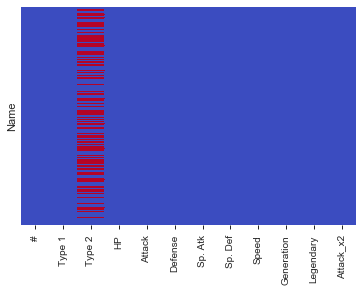

In [175]:
import seaborn as sns
x = df.isnull()
sns.heatmap(x, cmap='coolwarm', yticklabels=False, cbar=False)

### Eliminar NaN Values

In [119]:
#eliminar columna 
df.drop("Type 2",axis=1).head()

,#,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,1,Grass,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,60,62,63,80,80,60,1,False
Venusaur,3,Grass,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,80,100,123,122,120,80,1,False
Charmander,4,Fire,39,52,43,60,50,65,1,False


In [128]:
#Eliminar Filas
y = df.dropna()
print(y.shape, df.shape)

(414, 11) (800, 11)


In [132]:
# Reemplzar valores NAn
df.fillna(value="hola").head() 

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,Fire,hola,39,52,43,60,50,65,1,False


### Operaciones 

#### Operaciones Básicas

In [150]:
df['Attack'].sum()

63201

In [152]:
df.sort_values(by='Type 1').head( )

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack_x2
Name,,,,,,,,,,,,
Sewaddle,540,Bug,Grass,45,53,70,40,60,42,5,False,106
Pinsir,127,Bug,NaN,65,125,100,55,70,85,1,False,250
Burmy,412,Bug,NaN,40,29,45,29,45,36,4,False,58
Scyther,123,Bug,Flying,70,110,80,55,80,105,1,False,220
Joltik,595,Bug,Electric,50,47,50,57,50,65,5,False,94


In [153]:
df.mean()

#             362.81375
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp. Atk        72.82000
Sp. Def        71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
Attack_x2     158.00250
dtype: float64

In [157]:
df.std()

#             208.343798
HP             25.534669
Attack         32.457366
Defense        31.183501
Sp. Atk        32.722294
Sp. Def        27.828916
Speed          29.060474
Generation      1.661290
Legendary       0.273390
Attack_x2      64.914732
dtype: float64

### Info en valores únicos 

In [135]:
#Valores únicos
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [137]:
#Cantidad de Valores únicos
df['Type 1'].nunique()

18

In [41]:
#Frecuencia Absoluta 
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

### Aplicar Funciones

In [140]:
def times2(x):
    return x*2

In [146]:
df["Attack_x2"] = df['Attack'].apply(times2)
df.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack_x2
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False,98
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False,124
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False,164
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False,200
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False,104


In [149]:
df["Type 1"].apply(len).head( )

Name
Bulbasaur                5
Ivysaur                  5
Venusaur                 5
VenusaurMega Venusaur    5
Charmander               4
Name: Type 1, dtype: int64

## Group By

In [168]:
df_group = df.groupby("Type 1")
df_group.mean()["Attack"].sort_values(ascending=False)

Type 1
Dragon      112.125000
Fighting     96.777778
Ground       95.750000
Rock         92.863636
Steel        92.703704
Dark         88.387097
Fire         84.769231
Flying       78.750000
Poison       74.678571
Water        74.151786
Ghost        73.781250
Normal       73.469388
Grass        73.214286
Ice          72.750000
Psychic      71.456140
Bug          70.971014
Electric     69.090909
Fairy        61.529412
Name: Attack, dtype: float64

In [171]:
df_group.std()["Attack"]

Type 1
Bug         37.040904
Dark        25.774247
Dragon      33.742622
Electric    23.764169
Fairy       29.751298
Fighting    28.290163
Fire        28.769275
Flying      37.500000
Ghost       29.629687
Grass       25.380520
Ground      33.059087
Ice         27.289511
Normal      30.295862
Poison      19.630010
Psychic     42.309265
Rock        35.325458
Steel       30.388276
Water       28.377192
Name: Attack, dtype: float64

In [173]:
df_group.describe()["HP"]

,count,mean,std,min,25%,50%,75%,max
Type 1,,,,,,,,
Bug,69.0,56.884058,16.328914,1.0,45.00,60.0,70.00,86.0
Dark,31.0,66.806452,21.078297,35.0,51.00,65.0,73.50,126.0
Dragon,32.0,83.312500,23.795415,41.0,67.50,80.0,101.25,125.0
Electric,44.0,59.795455,17.306511,20.0,50.00,60.0,70.00,90.0
Fairy,17.0,74.117647,23.587291,35.0,55.00,78.0,90.00,126.0
Fighting,27.0,69.851852,25.852695,30.0,50.00,70.0,79.00,144.0
Fire,52.0,69.903846,19.404123,38.0,58.00,70.0,80.00,115.0
Flying,4.0,70.750000,20.694202,40.0,69.25,79.0,80.50,85.0
Ghost,32.0,64.437500,31.685895,20.0,45.00,59.5,64.25,150.0


Otras operaciones son: 
- .min
- .max
- .count

##  Concadenar Dataframes

Se puede Armar Dataframes a partir de Diccionarios 

In [4]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [3]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [5]:
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [16]:
pd.concat([df1,df2], axis=1) #Por Default axis=0

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


In [8]:
df3 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[0, 1, 2, 3]) 

In [15]:
pd.concat([df1,df3], axis=1) #Concadena según los índices

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


##  Exportar archivos 

In [38]:
#Exportando a CSV
df3.to_csv('example.csv',index=False)
#Exportando a Excel
df3.to_excel("excel_df.xlsx", index=False)

In [40]:
pd.read_csv("example.csv")

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


# Felicitaciones por completar el curso, ¡Seguí así!  